### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import cv2

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Importing data

In [3]:
path = os.listdir('brain_tumor_dataset/Training/')
classes = {'no_tumor':0, 'tumor':1}

In [4]:
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor_dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualizing the data

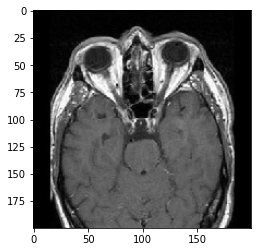

In [9]:
plt.imshow(X[0], cmap='gray')

### Reshaping the data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Splitting the Data into 80 % training and 20% testing

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = xtrain
# pca_test = xtest
# xtrain = pca.fit_transform(xtrain)
# xtest = pca.transform(xtest)

(977, 40000) (245, 40000)


### Training Model using logistic regression and Support Vector Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [20]:
rf = RandomForestClassifier(n_estimators = 100) 
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(xtrain,ytrain)

### Evaluating the model

In [22]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [23]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [24]:
print("Training Score:", knn.score(xtrain, ytrain))
print("Testing Score:", knn.score(xtest, ytest))

Training Score: 0.9314227226202662
Testing Score: 0.9346938775510204


In [25]:
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9795918367346939


In [26]:
print("Training Score:", dtree.score(xtrain, ytrain))
print("Testing Score:", dtree.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


### Running the prediction function on the test data

### Here we chose Random Forest as it had the highest model score

In [27]:
pred = rf.predict(xtest)

In [28]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3, 128, 139, 227, 235], dtype=int64),)

In [29]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  5
1 1


# Model Accuracy

In [30]:
from sklearn import metrics 

In [31]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(ytest, pred))

ACCURACY OF THE MODEL:  0.9795918367346939


### TESTING THE MODEL

In [32]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

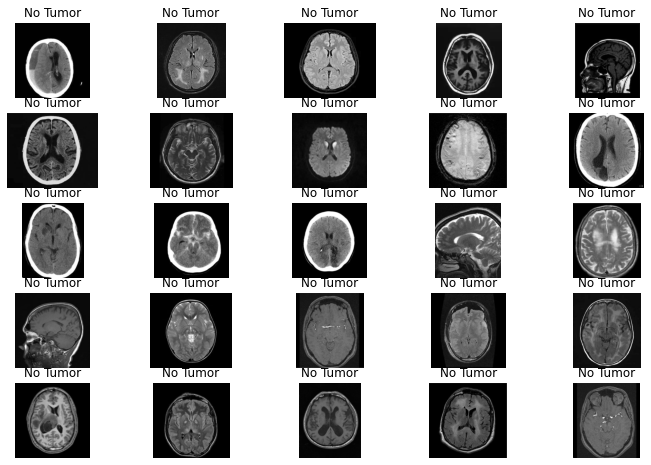

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('brain_tumor_dataset/Testing/no_tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('brain_tumor_dataset/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

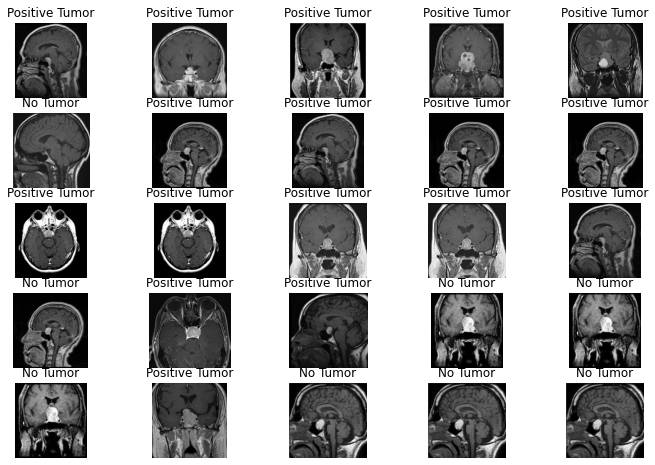

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor_dataset/Testing/')
c=1
for i in os.listdir('brain_tumor_dataset/Testing/tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('brain_tumor_dataset/Testing/tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
    


### SEGMENTATION OF 1 IMAGE FROM POSITIVE TUMOR DATASET

In [35]:
class Partition:
    def __init__(self,partitions=4) :
        self.partitions=partitions
    def kmeansClustering(self,SegImage) :
        SegImage=cv2.GaussianBlur(SegImage,(9,9),0)
        vectorized=SegImage.reshape(-1,3)
        vectorized=np.float32(vectorized)
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        ret,label,center=cv2.kmeans(vectorized,self.partitions,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
        res = center[label.flatten()]
        segmented_image = res.reshape((SegImage.shape))
        return label.reshape((SegImage.shape[0],SegImage.shape[1])),segmented_image.astype(np.uint8)
    def extractComponent(self,SegImage,label_image,label):
        component=np.zeros(SegImage.shape,np.uint8)
        component[label_image==label]=SegImage[label_image==label]
        return component

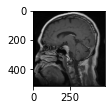

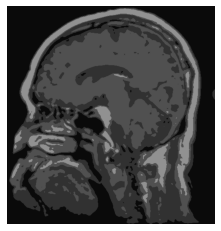

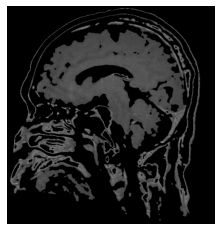

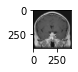

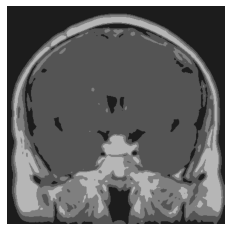

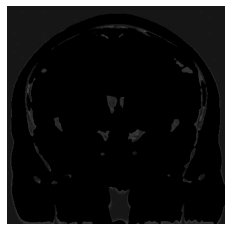

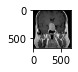

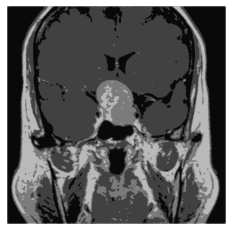

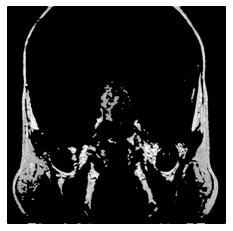

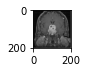

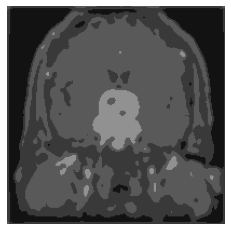

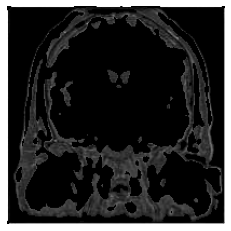

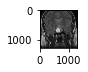

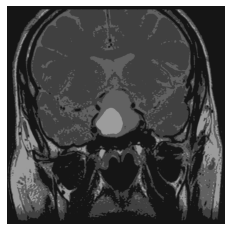

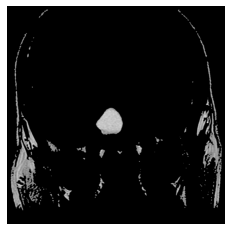

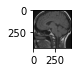

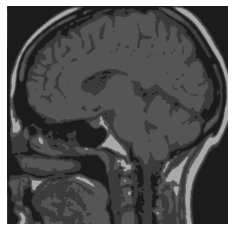

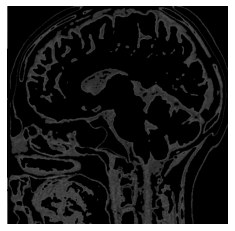

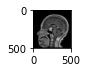

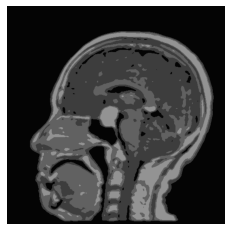

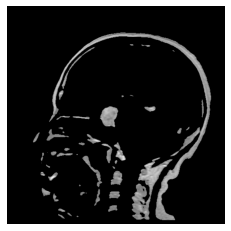

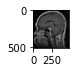

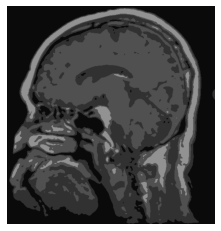

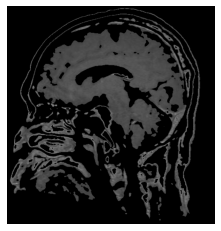

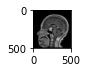

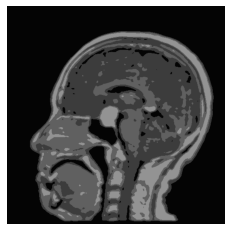

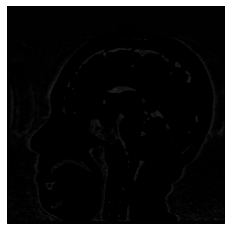

ValueError: num must be 1 <= num <= 25, not 28

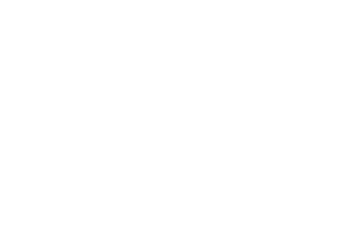

In [41]:
%matplotlib inline
if __name__=='__main__':
    import argparse
    import sys
    
    
    plt.figure(figsize=(12,8))
    p = os.listdir('brain_tumor_dataset/Testing/')
    c=1
    for i in os.listdir('brain_tumor_dataset/Testing/tumor/')[:25]:
        plt.subplot(5,5,c)
        
        
        
        SegImage=cv2.imread('brain_tumor_dataset/Testing/tumor/'+i)
        
    
        parts = Partition()
    
        label, output = parts.kmeansClustering(SegImage)
        
        
        #SegImage = cv2.resize(SegImage, (200,200))
        #SegImage = SegImage.reshape(1,-1)/255
        plt.imshow(SegImage,cmap='gray')
        plt.show()
        plt.axis('off')
        c+=1

        plt.imshow(output,cmap='gray')
        plt.show()
        plt.axis('off')
        c+=1

    
        output=parts.extractComponent(SegImage,label,3)
        plt.imshow(output,cmap='gray')
        plt.show()
        plt.axis('off')
        c+=1
        

        #img = cv2.imread('brain_tumor_dataset/Testing/tumor/'+i,0)
        #img1 = cv2.resize(img, (200,200))
        #img1 = img1.reshape(1,-1)/255
        #p = rf.predict(img1)
        #plt.title(dec[p[0]])
        #plt.imshow(img, cmap='gray')
        
    
    
    

In [ ]:
%matplotlib inline
if __name__=='__main__':
    import argparse
    import sys
    
    SegImage=cv2.imread("brain_tumor_dataset/Testing/tumor/image(57).jpg")
    
    parts = Partition()
    
    label, output = parts.kmeansClustering(SegImage)
#     SegImage = cv2.resize(SegImage, (200,200))
#     output = cv2.resize(output, (200,200))
#     cv2.imshow("Original Image",SegImage)
#     cv2.imshow("Segmented Image",output)
    plt.imshow(SegImage,cmap='gray')
    plt.show()
    plt.imshow(output,cmap='gray')
    plt.show()

    
    output=parts.extractComponent(SegImage,label,3)
    

#     cv2.imshow("Extracted_image",output)
#     cv2.waitKey(0)
    plt.imshow(output,cmap='gray')
#     plt.show()
    